In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# 1. Data Sourcing

In [2]:
# Reading Data from local
df = pd.read_csv("/Users/allen/Documents/Final Project/Data/loan_data.csv")

In [3]:
col_list = df.columns.to_list()

In [4]:
print("No of Columns: {}".format(len(col_list)))

No of Columns: 158


In [5]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Columns: 158 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(80), int64(46), object(32)
memory usage: 1.7+ GB


# 1.2 Dimensionality reduction

In [7]:
df.shape


(1413701, 158)

In [9]:
df1 = df.copy()

In [10]:
df1.shape

(1413701, 158)

In [11]:
'''
df_year = df1[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].apply(lambda y: -(y // 365))
df_year.columns = [['Age','Emp_Experience','Year_Registration','Year_Id_Publish']]
df1[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']]
'''

"\ndf_year = df1[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].apply(lambda y: -(y // 365))\ndf_year.columns = [['Age','Emp_Experience','Year_Registration','Year_Id_Publish']]\ndf1[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']]\n"

In [12]:
df1[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']]


,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-16765,-1188,-1186.0,-291
3,-16765,-1188,-1186.0,-291
4,-19046,-225,-4260.0,-2531
...,...,...,...,...
1413696,-16856,-1262,-5128.0,-410
1413697,-16856,-1262,-5128.0,-410
1413698,-16856,-1262,-5128.0,-410
1413699,-16856,-1262,-5128.0,-410


In [13]:
#df['Total_Submitted_Documents'] = 
df1['Total_Documents']= df1.iloc[:,96:116].sum(axis= 1)
for i in range(df1.Total_Documents.max()):
    print("Total_Documents:{} \n {} ".format(i, df1.loc[df1['Total_Documents'] == i,'TARGET'].value_counts()))

Total_Documents:0 
 TARGET
0    103085
1      6788
Name: count, dtype: int64 
Total_Documents:1 
 TARGET
0    1169378
1     114709
Name: count, dtype: int64 
Total_Documents:2 
 TARGET
0    18425
1      797
Name: count, dtype: int64 


In [14]:
df1.iloc[:,96:116]

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1413697,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1413698,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1413699,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
df1.drop(df1.iloc[:,96:116], axis = 1, inplace= True)

In [16]:
df1.shape

(1413701, 139)

In [17]:
# Dropping Irrelevant Normalized Data
df_normalized = df1.iloc[:,44:91]
df_normalized
df1.drop(df_normalized, axis= 1, inplace= True)

In [18]:
df1.shape

(1413701, 92)

In [19]:
a = ['FLAG_CONT_MOBILE','FLAG_LAST_APPL_PER_CONTRACT','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_REQ_CREDIT_BUREAU_HOUR']
for i in a:
    print(df1[['TARGET',i,'SK_ID_CURR']].groupby([i,'TARGET']).count())

                         SK_ID_CURR
FLAG_CONT_MOBILE TARGET            
0                0              974
                 1               93
1                0          1290367
                 1           122267
                                    SK_ID_CURR
FLAG_LAST_APPL_PER_CONTRACT TARGET            
N                           0             6523
                            1              791
Y                           0          1284818
                            1           121569
                     SK_ID_CURR
FLAG_OWN_CAR TARGET            
N            0           853334
             1            83842
Y            0           438007
             1            38518
                        SK_ID_CURR
FLAG_OWN_REALTY TARGET            
N               0           354571
                1            35038
Y               0           936770
                1            87322
                                   SK_ID_CURR
AMT_REQ_CREDIT_BUREAU_HOUR TARGET            
0.0     

In [20]:
df1.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    1242620
1.0       7188
2.0        236
3.0         26
4.0          4
Name: count, dtype: int64

In [21]:
a = df1[['SK_ID_PREV','SK_ID_CURR','NAME_CONTRACT_TYPE_x','AMT_ANNUITY_x','AMT_APPLICATION','AMT_CREDIT_x',
     'AMT_DOWN_PAYMENT','AMT_GOODS_PRICE_x','WEEKDAY_APPR_PROCESS_START_x','HOUR_APPR_PROCESS_START_x',
     'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','RATE_DOWN_PAYMENT',
     'NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','DAYS_DECISION','NAME_PAYMENT_TYPE',
     'CODE_REJECT_REASON','NAME_TYPE_SUITE_x','NAME_CLIENT_TYPE',
     'NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','SELLERPLACE_AREA',
     'NAME_SELLER_INDUSTRY','CNT_PAYMENT','NAME_YIELD_GROUP','PRODUCT_COMBINATION','DAYS_FIRST_DRAWING',
     'DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION',
     'NFLAG_INSURED_ON_APPROVAL']].columns
len(a)


35

# 1.3 Null values Imputation

In [22]:
arr = df1.isnull().mean().sort_values(ascending = False)
for i in arr.keys():
    if (arr[i] > 0):
        print("{}: {}".format(i, arr[i] * 100))
len(arr)

RATE_INTEREST_PRIMARY: 99.66110231229942
RATE_INTEREST_PRIVILEGED: 99.66110231229942
OWN_CAR_AGE: 66.2944993318955
EXT_SOURCE_1: 56.36686965631347
RATE_DOWN_PAYMENT: 53.019697941785424
AMT_DOWN_PAYMENT: 53.019697941785424
NAME_TYPE_SUITE_y: 49.138537781327166
DAYS_LAST_DUE: 39.6905710613489
DAYS_LAST_DUE_1ST_VERSION: 39.6905710613489
DAYS_FIRST_DUE: 39.6905710613489
DAYS_FIRST_DRAWING: 39.6905710613489
DAYS_TERMINATION: 39.6905710613489
NFLAG_INSURED_ON_APPROVAL: 39.6905710613489
OCCUPATION_TYPE: 32.36752325986895
AMT_GOODS_PRICE_y: 22.60202121947993
AMT_ANNUITY_y: 21.731469384261594
CNT_PAYMENT: 21.731115702683947
EXT_SOURCE_3: 17.107012020222097
AMT_REQ_CREDIT_BUREAU_QRT: 11.574371101102708
AMT_REQ_CREDIT_BUREAU_YEAR: 11.574371101102708
AMT_REQ_CREDIT_BUREAU_HOUR: 11.574371101102708
AMT_REQ_CREDIT_BUREAU_DAY: 11.574371101102708
AMT_REQ_CREDIT_BUREAU_WEEK: 11.574371101102708
AMT_REQ_CREDIT_BUREAU_MON: 11.574371101102708
NAME_TYPE_SUITE_x: 0.24941624855609493
OBS_30_CNT_SOCIAL_CIRCLE: 

92

In [26]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [27]:
missing_values_table(df1,na_name= True)

                             n_miss  ratio
RATE_INTEREST_PRIMARY       1408910  99.66
RATE_INTEREST_PRIVILEGED    1408910  99.66
OWN_CAR_AGE                  937206  66.29
EXT_SOURCE_1                 796859  56.37
AMT_DOWN_PAYMENT             749540  53.02
RATE_DOWN_PAYMENT            749540  53.02
NAME_TYPE_SUITE_y            694672  49.14
DAYS_FIRST_DRAWING           561106  39.69
NFLAG_INSURED_ON_APPROVAL    561106  39.69
DAYS_LAST_DUE_1ST_VERSION    561106  39.69
DAYS_LAST_DUE                561106  39.69
DAYS_TERMINATION             561106  39.69
DAYS_FIRST_DUE               561106  39.69
OCCUPATION_TYPE              457580  32.37
AMT_GOODS_PRICE_y            319525  22.60
AMT_ANNUITY_y                307218  21.73
CNT_PAYMENT                  307213  21.73
EXT_SOURCE_3                 241842  17.11
AMT_REQ_CREDIT_BUREAU_YEAR   163627  11.57
AMT_REQ_CREDIT_BUREAU_QRT    163627  11.57
AMT_REQ_CREDIT_BUREAU_MON    163627  11.57
AMT_REQ_CREDIT_BUREAU_WEEK   163627  11.57
AMT_REQ_CRE

['AMT_ANNUITY_x',
 'AMT_GOODS_PRICE_x',
 'NAME_TYPE_SUITE_x',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_ANNUITY_y',
 'AMT_CREDIT_y',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE_y',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE_y',
 'CNT_PAYMENT',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [28]:
df1['RATE_DOWN_PAYMENT'].value_counts()
df1['RATE_DOWN_PAYMENT'].fillna(0, inplace= True)


In [29]:
df1['AMT_DOWN_PAYMENT'].value_counts()
df1['AMT_DOWN_PAYMENT'].fillna(0, inplace= True)

In [30]:
df1['NAME_TYPE_SUITE_y'].value_counts()
df1['NAME_TYPE_SUITE_y'].fillna('Unknown', inplace= True)

In [31]:
df1['NFLAG_INSURED_ON_APPROVAL'].value_counts()
df1['DAYS_TERMINATION'].value_counts()
df1['DAYS_LAST_DUE'].value_counts()
df1['DAYS_LAST_DUE_1ST_VERSION'].value_counts()
df1['DAYS_FIRST_DUE'].value_counts()
df1['DAYS_FIRST_DRAWING'].value_counts()

DAYS_FIRST_DRAWING
 365243.0    799094
-228.0          115
-224.0          113
-212.0          112
-220.0          111
              ...  
-1834.0           1
-1557.0           1
-1840.0           1
-1886.0           1
-1857.0           1
Name: count, Length: 2799, dtype: int64

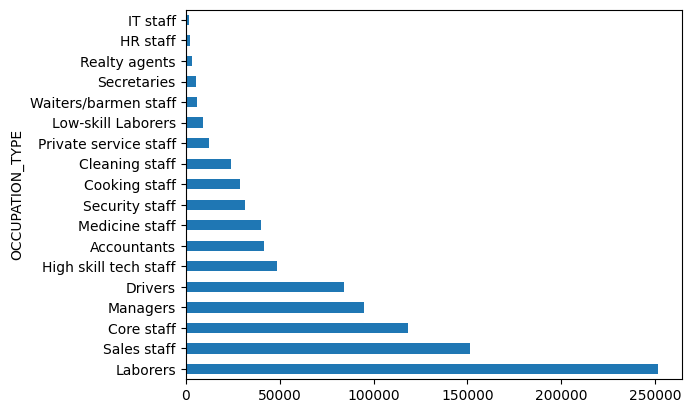

In [32]:
df1.OCCUPATION_TYPE.value_counts().plot.barh()
plt.show()

In [33]:
#To keep distribution as it is
df1['OCCUPATION_TYPE'].fillna(method='ffill',inplace=True)

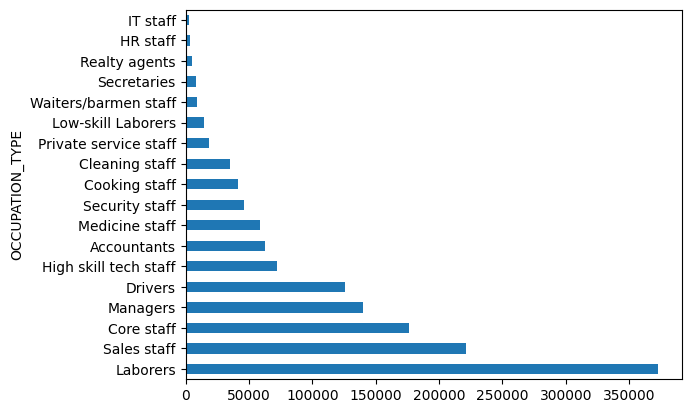

In [34]:

df1.OCCUPATION_TYPE.value_counts().plot.barh()
plt.show()

[]

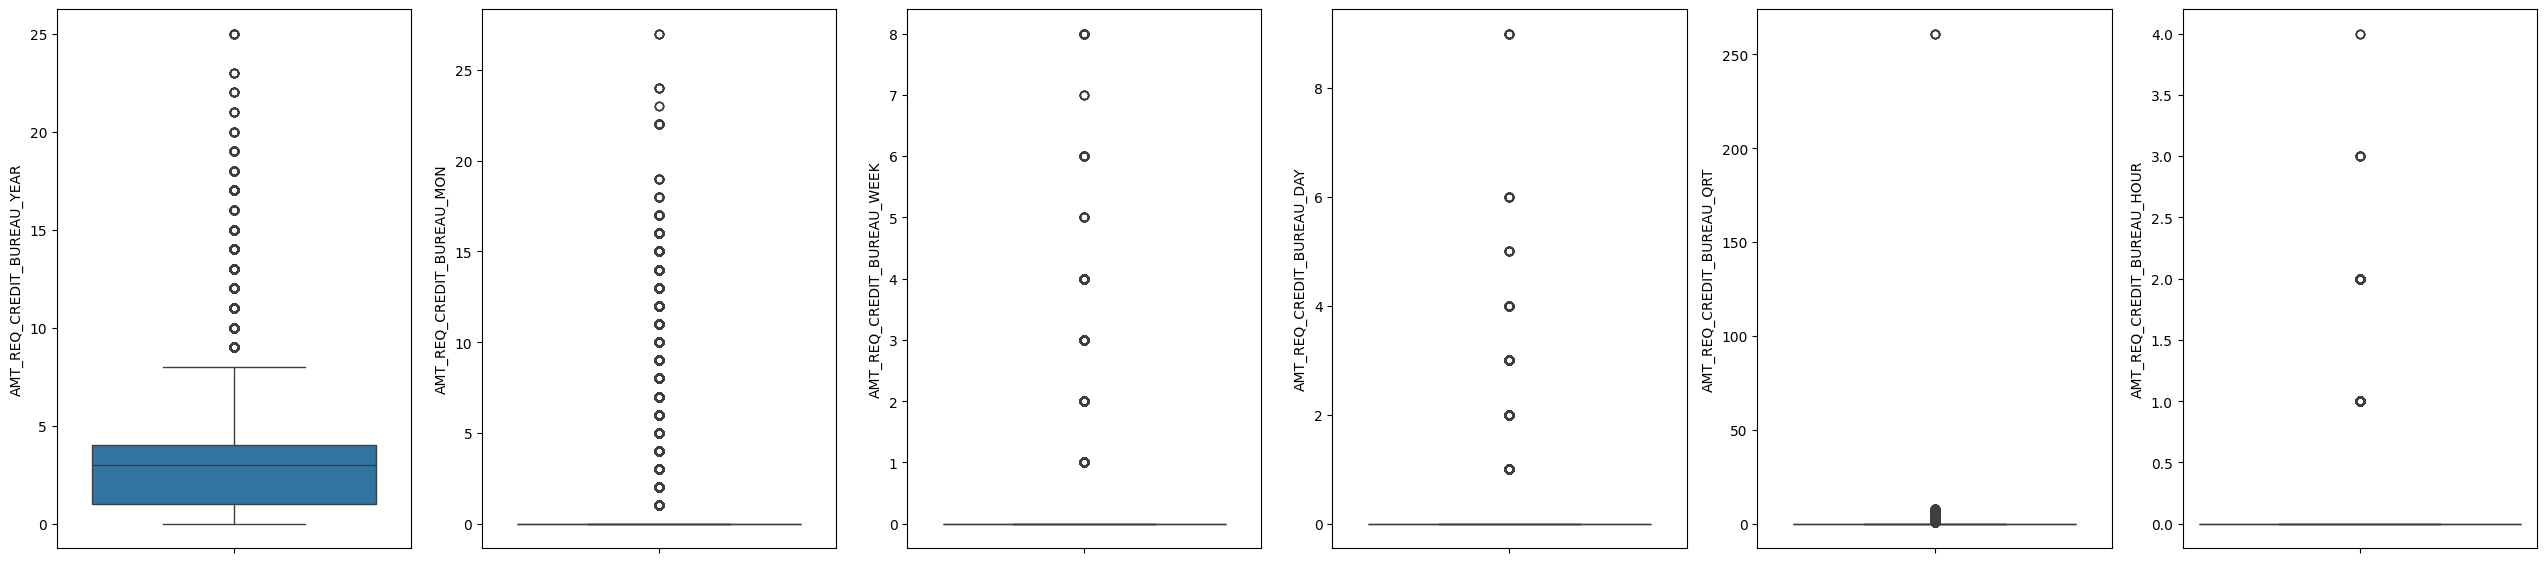

In [35]:
# Columns AMT_REQ_CREDIT_BUREAU** has 12% of missing value. Let us plot and see the distribution.
fig, (ax1,ax2,ax3,ax4,ax5,ax6)=plt.subplots(ncols=6,figsize=(32,7))
sns.boxplot((df1.AMT_REQ_CREDIT_BUREAU_YEAR),ax=ax1)
sns.boxplot((df1.AMT_REQ_CREDIT_BUREAU_MON),ax=ax2)
sns.boxplot((df1.AMT_REQ_CREDIT_BUREAU_WEEK),ax=ax3)
sns.boxplot((df1.AMT_REQ_CREDIT_BUREAU_DAY),ax=ax4)
sns.boxplot((df1.AMT_REQ_CREDIT_BUREAU_QRT),ax=ax5)
sns.boxplot((df1.AMT_REQ_CREDIT_BUREAU_HOUR),ax=ax6)
plt.plot()

In [36]:
def impute_missing_median(col):
    df1[col]=df1[col].fillna(value=df1[col].median())
    return df1[col].isnull().sum()


In [37]:
impute_missing_median('AMT_REQ_CREDIT_BUREAU_YEAR')
impute_missing_median('AMT_REQ_CREDIT_BUREAU_MON')
impute_missing_median('AMT_REQ_CREDIT_BUREAU_WEEK')
impute_missing_median('AMT_REQ_CREDIT_BUREAU_DAY')
impute_missing_median('AMT_REQ_CREDIT_BUREAU_HOUR')
impute_missing_median('AMT_REQ_CREDIT_BUREAU_QRT')

0

[]

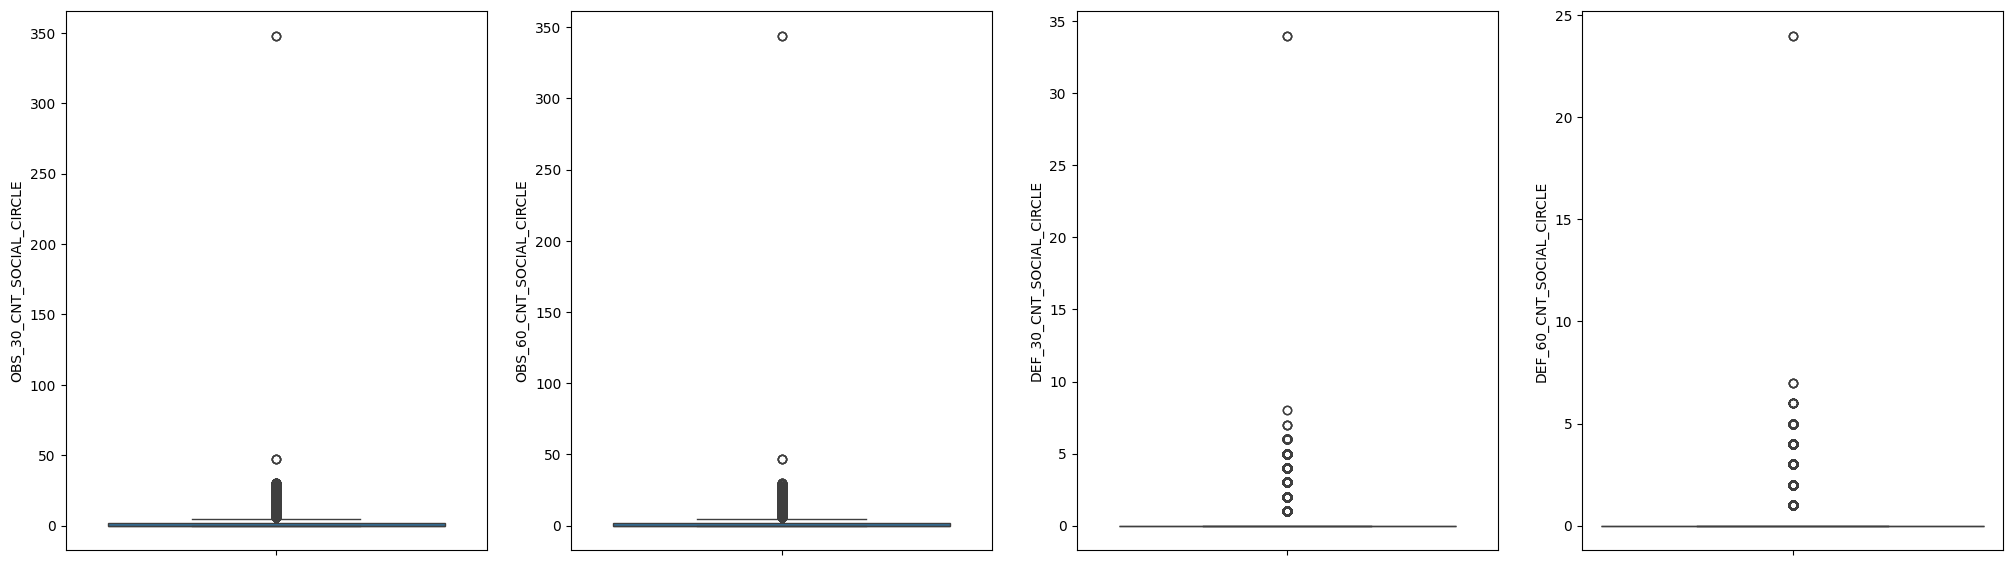

In [38]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(ncols=4,figsize=(25,7))
sns.boxplot((df1.OBS_30_CNT_SOCIAL_CIRCLE),ax=ax1)
sns.boxplot((df1.OBS_60_CNT_SOCIAL_CIRCLE),ax=ax2)
sns.boxplot((df1.DEF_30_CNT_SOCIAL_CIRCLE),ax=ax3)
sns.boxplot((df1.DEF_60_CNT_SOCIAL_CIRCLE),ax=ax4)
plt.plot()

In [39]:
# Treating Extreme Value with median Value:
df1["OBS_60_CNT_SOCIAL_CIRCLE"] = np.where(df1["OBS_60_CNT_SOCIAL_CIRCLE"] > 50, float(df1['OBS_60_CNT_SOCIAL_CIRCLE'].median()), df1["OBS_60_CNT_SOCIAL_CIRCLE"])
df1["OBS_30_CNT_SOCIAL_CIRCLE"] = np.where(df1["OBS_30_CNT_SOCIAL_CIRCLE"] > 50, float(df1['OBS_30_CNT_SOCIAL_CIRCLE'].median()), df1["OBS_30_CNT_SOCIAL_CIRCLE"])

# Trating missing Values with Median Value:
impute_missing_median('OBS_60_CNT_SOCIAL_CIRCLE')
impute_missing_median('OBS_30_CNT_SOCIAL_CIRCLE')
impute_missing_median('DEF_30_CNT_SOCIAL_CIRCLE')
impute_missing_median('DEF_60_CNT_SOCIAL_CIRCLE')

0

[]

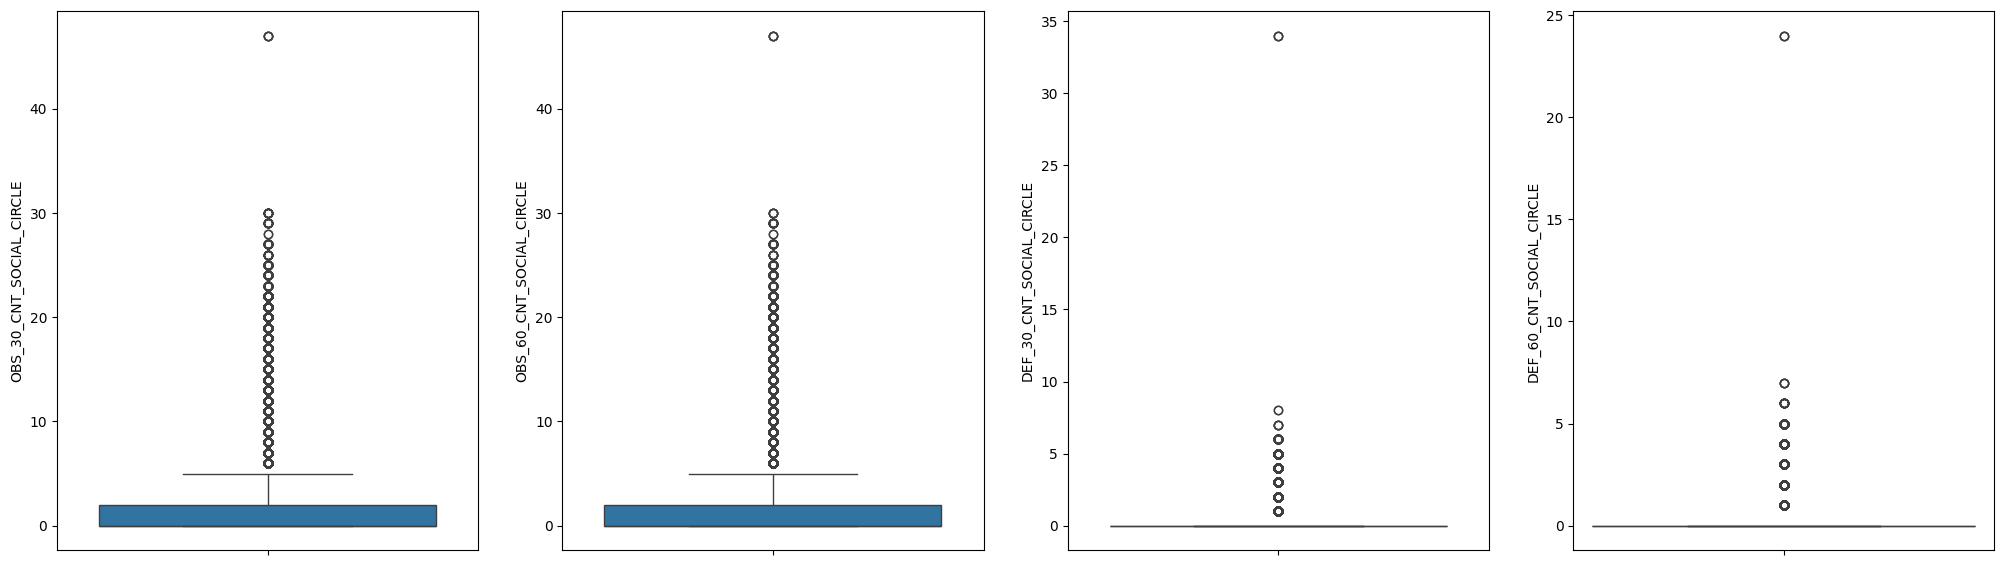

In [40]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(ncols=4,figsize=(25,7))
sns.boxplot((df1.OBS_30_CNT_SOCIAL_CIRCLE),ax=ax1)
sns.boxplot((df1.OBS_60_CNT_SOCIAL_CIRCLE),ax=ax2)
sns.boxplot((df1.DEF_30_CNT_SOCIAL_CIRCLE),ax=ax3)
sns.boxplot((df1.DEF_60_CNT_SOCIAL_CIRCLE),ax=ax4)
plt.plot()

['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A'
 'Group of people' 'Other_B' nan]


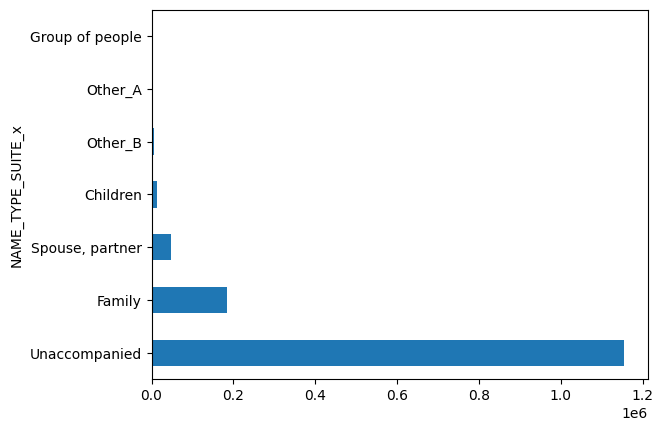

In [41]:
print(df1['NAME_TYPE_SUITE_x'].unique())
df1['NAME_TYPE_SUITE_x'].value_counts().plot.barh()
plt.show()

In [42]:
df1.NAME_TYPE_SUITE_x.fillna(df1.NAME_TYPE_SUITE_x.mode()[0],inplace=True)


In [43]:
col_list

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_x',
 'AMT_ANNUITY_x',
 'AMT_GOODS_PRICE_x',
 'NAME_TYPE_SUITE_x',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START_x',
 'HOUR_APPR_PROCESS_START_x',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGIN

In [44]:
# Dropping Columns having more than 40% null values and irrelevant
#drop_col = [] # More than 99 % of null values
drop_col = ['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY','OWN_CAR_AGE','EXT_SOURCE_1', 
            'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 
            'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']
  

df1 = df1.drop(columns= drop_col)


In [45]:
df1.shape

(1413701, 82)

<Axes: xlabel='EXT_SOURCE_3', ylabel='Density'>

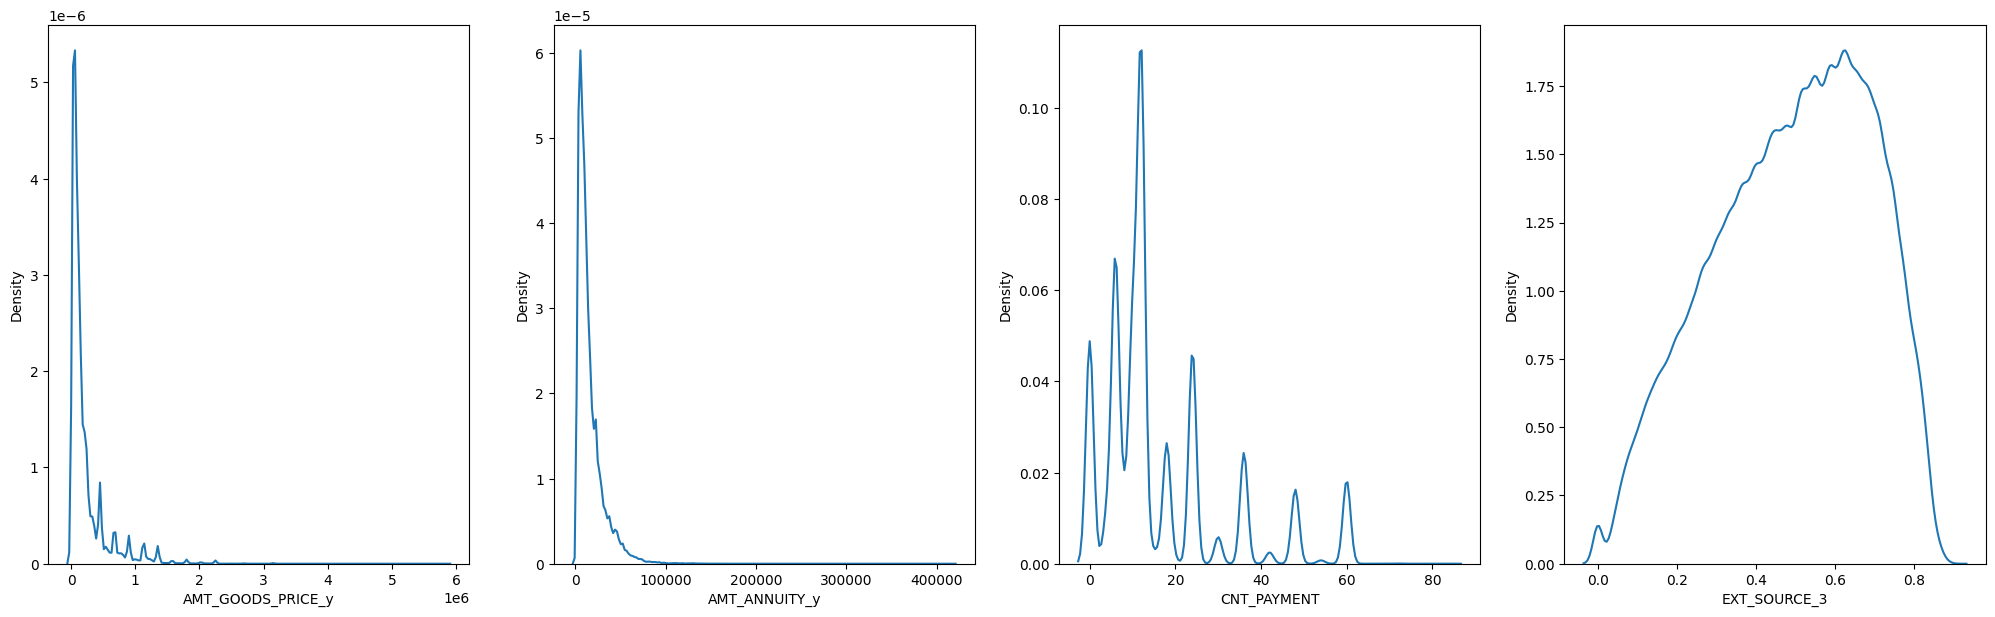

In [46]:
#Filling other columns null values
fig, (ax1,ax2,ax3,ax4)=plt.subplots(ncols=4,figsize=(25,7))
sns.kdeplot((df1.AMT_GOODS_PRICE_y),ax=ax1)
sns.kdeplot((df1.AMT_ANNUITY_y),ax=ax2)
sns.kdeplot((df1.CNT_PAYMENT),ax=ax3)
sns.kdeplot((df1.EXT_SOURCE_3),ax=ax4)

In [47]:
def impute_missing_mean(col):
    df1[col]=df1[col].fillna(value=df1[col].mean())
    return df1[col].isnull().sum()

In [48]:
impute_missing_mean('AMT_GOODS_PRICE_y')
impute_missing_mean('AMT_ANNUITY_y')
impute_missing_mean('CNT_PAYMENT')
impute_missing_mean('EXT_SOURCE_3')


0

In [49]:
missing_values_table(df1,na_name= True)


                     n_miss  ratio
EXT_SOURCE_2           1821   0.13
AMT_GOODS_PRICE_x      1208   0.09
PRODUCT_COMBINATION     313   0.02
AMT_ANNUITY_x            93   0.01
AMT_CREDIT_y              1   0.00


['AMT_ANNUITY_x',
 'AMT_GOODS_PRICE_x',
 'EXT_SOURCE_2',
 'AMT_CREDIT_y',
 'PRODUCT_COMBINATION']

In [50]:
#Dropping row data of columns which have less than 0.1 % of total data

In [51]:
df1.shape

(1413701, 82)

In [52]:
df1.dropna(inplace= True)

In [53]:
df.AMT_ANNUITY_y

0           9251.775
1          98356.995
2          64567.665
3           6737.310
4           5357.250
             ...    
1413696    16400.610
1413697     2250.000
1413698    30737.655
1413699    54022.140
1413700    11514.555
Name: AMT_ANNUITY_y, Length: 1413701, dtype: float64

In [54]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,Total_Documents
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,1
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,1
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,1
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,0


In [55]:
df1.shape

(1410271, 82)

In [56]:
# Dropping 'XNA' code gender since it it less than 0.1 % of total data in the column
df1.CODE_GENDER.value_counts()
df1.drop(df1[df1['CODE_GENDER'] == 'XNA'].index, inplace= True)

In [57]:
df1.CODE_GENDER.value_counts()

CODE_GENDER
F    952721
M    457495
Name: count, dtype: int64

# 1.4 Treating Default Values

In [58]:
print(df1['DAYS_EMPLOYED'].quantile([0,0.1,0.3,0.6,0.8,0.9,0.95,1]))

0.00    -17912.0
0.10     -4859.0
0.30     -2446.0
0.60      -864.0
0.80      -109.0
0.90    365243.0
0.95    365243.0
1.00    365243.0
Name: DAYS_EMPLOYED, dtype: float64


(272990, 82)

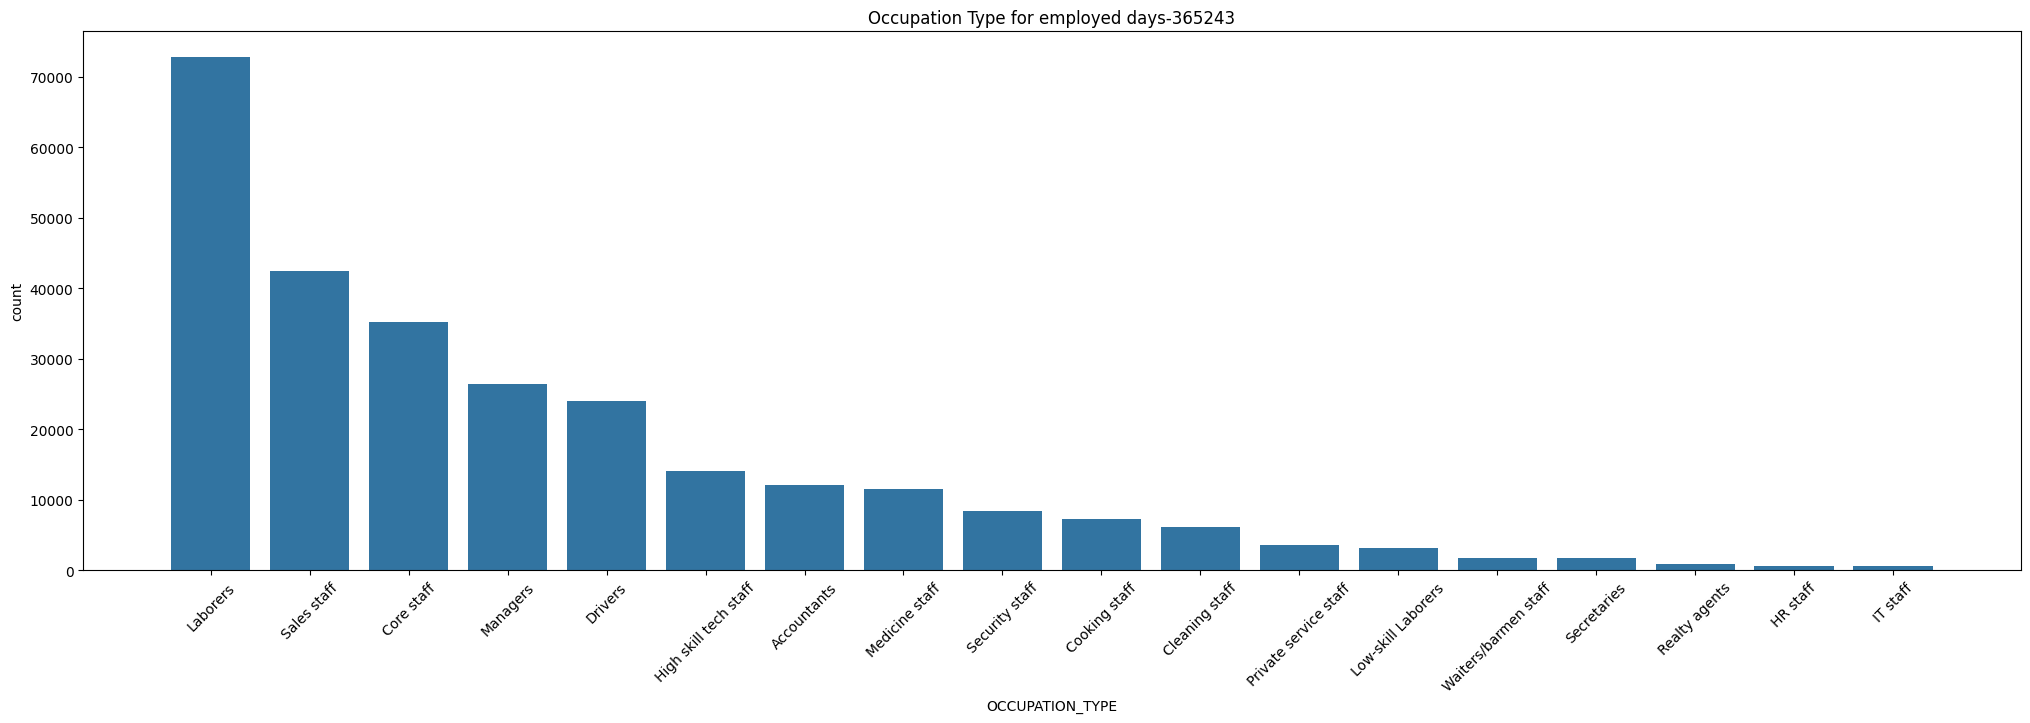

In [59]:
#Looking at distribution of Occupation Type where Days Employed column is filled with default value 365243

temp_df = (df1[df1['DAYS_EMPLOYED']==365243.0]).copy()

plt.figure(figsize=(25,7))
sns.barplot(x=temp_df['OCCUPATION_TYPE'].value_counts().index,y=temp_df['OCCUPATION_TYPE'].value_counts())
plt.xticks(rotation=45)
plt.title("Occupation Type for employed days-365243")
plt.plot()
temp_df.shape


In [60]:
temp_df['ORGANIZATION_TYPE'].value_counts()


ORGANIZATION_TYPE
XNA    272990
Name: count, dtype: int64

[]

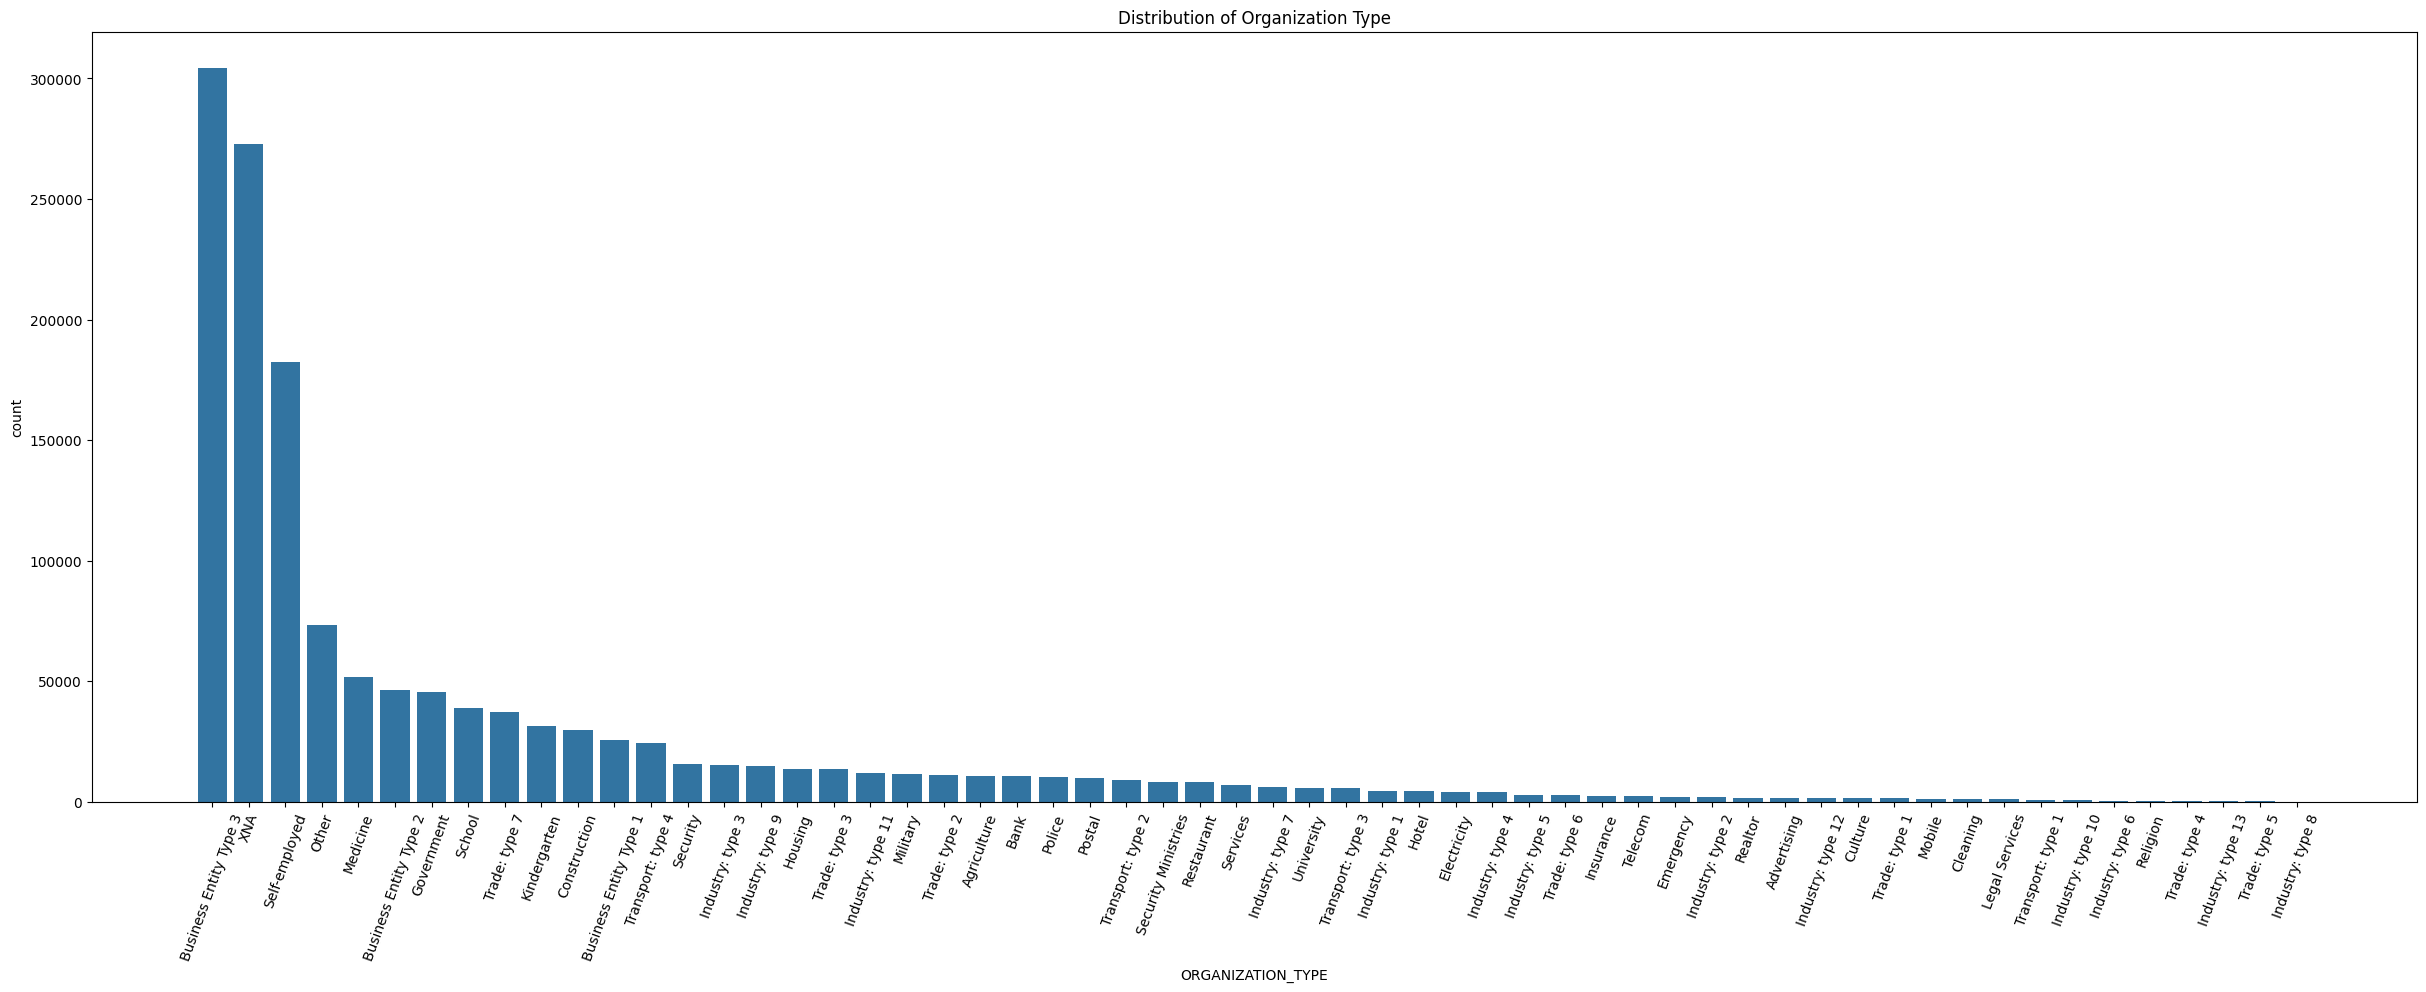

In [61]:
#Days Employed has around 2.5 L records filled with 365243 which comes to around 1000 years and looks like a default value is filled for days employed rather than leaving them blank.

#Organization Type for these default records are 'XNA' which is 2nd most overall

plt.figure(figsize=(30,10))
sns.barplot(x=df1['ORGANIZATION_TYPE'].value_counts().index,y=df1['ORGANIZATION_TYPE'].value_counts())
plt.xticks(rotation=70)
plt.title("Distribution of Organization Type")
plt.plot()


In [62]:
df1.ORGANIZATION_TYPE.replace(to_replace='XNA',value='Unknown',inplace=True)
df1.DAYS_EMPLOYED.replace(to_replace=365243.0,value=0,inplace=True)

# 1.5 Treating negative value

['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_DECISION']


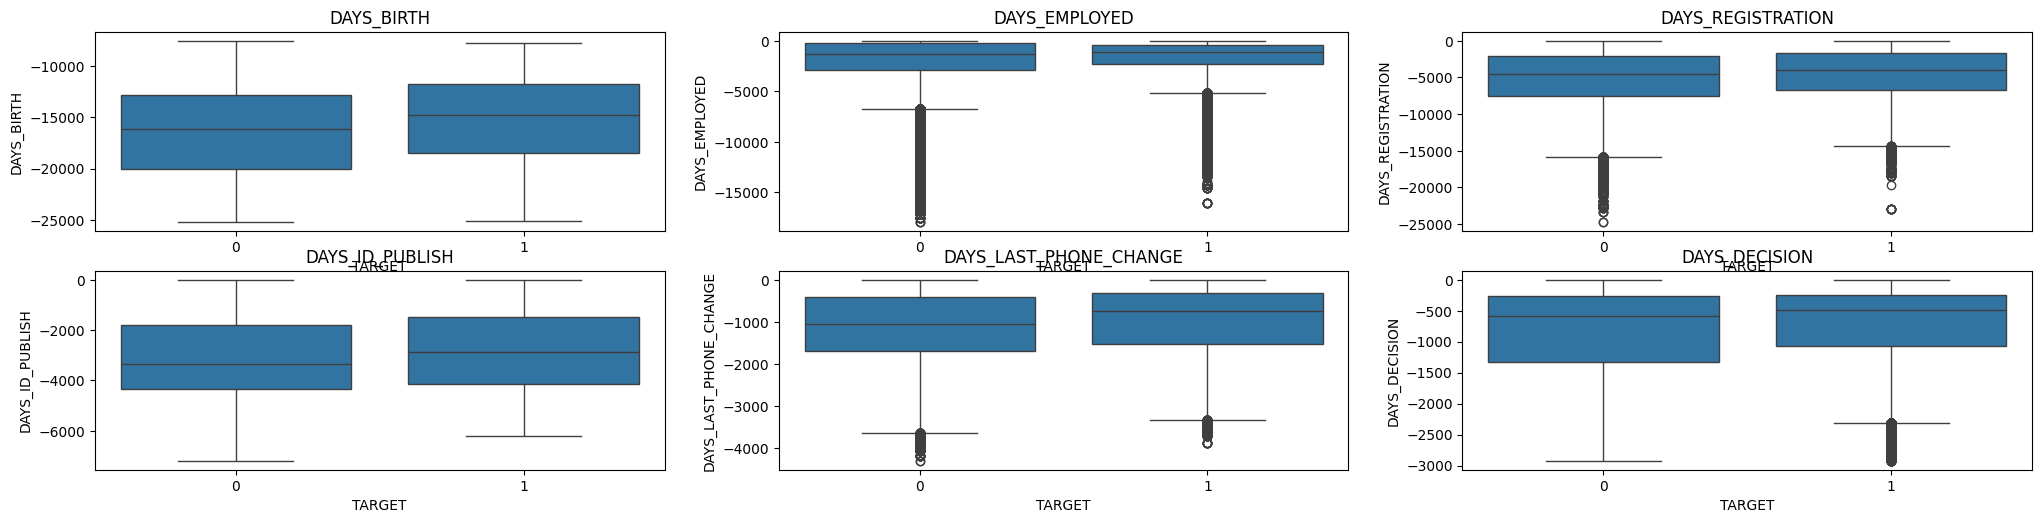

In [63]:
temp_list=[]
plotnum=1
plt.figure(figsize=(25,15), facecolor='white')
for col in df1.columns:
  if col.startswith('DAYS'):
    ax=plt.subplot(5,3,plotnum)
    sns.boxplot(x=df1['TARGET'],y=df1[col])
    plt.title(col)
    plt.plot()
    temp_list.append(col)
    plotnum+=1
print(temp_list)

In [64]:
# we have list of columns staring with Days stored in temp_list we can convert it to absolute value
df1[temp_list] = abs(df1[temp_list])

In [65]:
df1[temp_list]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_DECISION
0,9461,637,3648.0,2120,1134.0,606
1,16765,1188,1186.0,291,828.0,746
2,16765,1188,1186.0,291,828.0,828
3,16765,1188,1186.0,291,828.0,2341
4,19046,225,4260.0,2531,815.0,815
...,...,...,...,...,...,...
1413696,16856,1262,5128.0,410,787.0,648
1413697,16856,1262,5128.0,410,787.0,456
1413698,16856,1262,5128.0,410,787.0,171
1413699,16856,1262,5128.0,410,787.0,787


In [66]:
df1[temp_list].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_DECISION
count,1.410216e+06,1.410216e+06,1.410216e+06,1.410216e+06,1.410216e+06,1.410216e+06
mean,1.632206e+04,1.980859e+03,5.002883e+03,3.034629e+03,1.084923e+03,8.804095e+02
std,4.344429e+03,2.294272e+03,3.550856e+03,1.507429e+03,8.000735e+02,7.836441e+02
min,7.489000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.273900e+04,2.840000e+02,2.000000e+03,1.783000e+03,3.960000e+02,2.710000e+02
50%,1.604500e+04,1.281000e+03,4.508000e+03,3.330000e+03,1.011000e+03,5.820000e+02
75%,1.998000e+04,2.829000e+03,7.509000e+03,4.319000e+03,1.683000e+03,1.314000e+03
max,2.520100e+04,1.791200e+04,2.467200e+04,7.197000e+03,4.292000e+03,2.922000e+03


In [67]:
df1.isnull().sum()

SK_ID_CURR              0
TARGET                  0
NAME_CONTRACT_TYPE_x    0
CODE_GENDER             0
FLAG_OWN_CAR            0
                       ..
NAME_SELLER_INDUSTRY    0
CNT_PAYMENT             0
NAME_YIELD_GROUP        0
PRODUCT_COMBINATION     0
Total_Documents         0
Length: 82, dtype: int64

# Creating Bins for continous variable

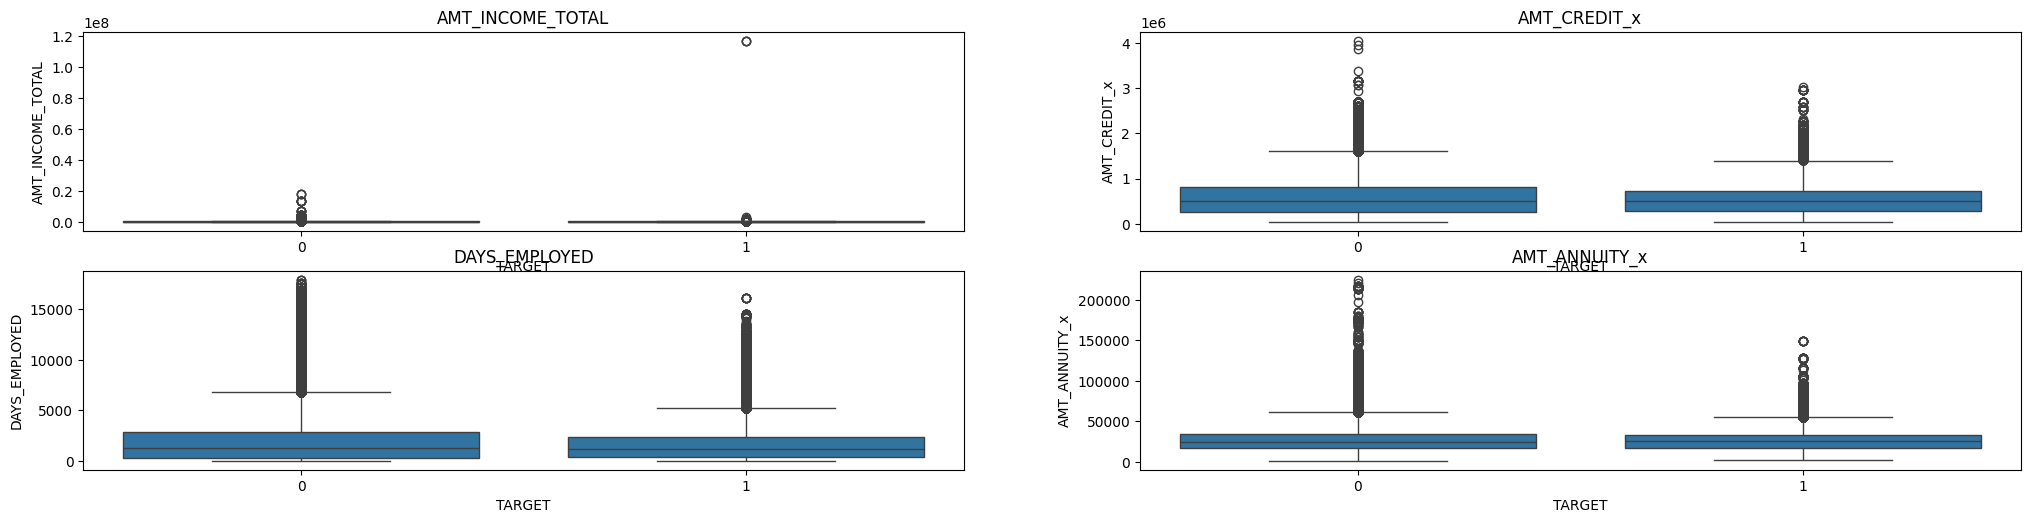

In [68]:
temp_col = ['AMT_INCOME_TOTAL','AMT_CREDIT_x','DAYS_EMPLOYED','AMT_ANNUITY_x']
plotnum=1
plt.figure(figsize=(25,15), facecolor='white')
for col in temp_col:
  ax=plt.subplot(5,2,plotnum)
  sns.boxplot(x=df1['TARGET'],y=df1[col])
  plt.title(col)
  plt.plot()
  plotnum+=1

In [69]:

bins = [0,1,2,3,4,5,6,7,8,9,10,15]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']
df1['AMT_INCOME_TOTAL'] = df1['AMT_INCOME_TOTAL']/100000
df1['AMT_INCOME_RANGE'] = pd.cut(df1['AMT_INCOME_TOTAL'], bins,labels=slot)
df1['AMT_INCOME_RANGE'].value_counts(normalize = True)*100
df1['AMT_INCOME_TOTAL'] = df1['AMT_INCOME_TOTAL']*100000
df1['AMT_INCOME_RANGE'].value_counts(normalize = True)*100


AMT_INCOME_RANGE
100K-200K    51.126448
200k-300k    23.499441
0-100K       17.650325
300k-400k     5.223020
400k-500k     1.767437
500k-600k     0.354041
600k-700k     0.225956
800k-900k     0.071985
700k-800k     0.039645
1M Above      0.034893
900k-1M       0.006808
Name: proportion, dtype: float64

Insights:
Income Range: Around 50% of the Applicant has Total Income Range 100-200K. Followed by 200-300k & 0-100K of 21% & 20% respectively. It is Understood that, pepole with very lower income range of 0 to 200K tend to apply for Loan the most.



In [70]:

# Creating bins for Credit amount
bins = [0,1,2,3,4,5,6,7,8,9,10,15]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']
df1['AMT_CREDIT_x']=df1['AMT_CREDIT_x']/100000
df1['AMT_CREDIT_RANGE']= pd.cut(df1['AMT_CREDIT_x'], bins,labels=slot)

df1['AMT_CREDIT_x']=df1['AMT_CREDIT_x']*100000
df1['AMT_CREDIT_RANGE'].value_counts(normalize = True)*100


AMT_CREDIT_RANGE
200k-300k    18.379408
1M Above     12.891526
500k-600k    11.696120
400k-500k    11.210038
100K-200K     9.536440
300k-400k     9.250446
600k-700k     8.073814
800k-900k     7.024290
700k-800k     6.594239
900k-1M       3.083555
0-100K        2.260124
Name: proportion, dtype: float64

Insight:
AMT_CREDIT_RANGE: Around 18% of the Applicant has got Amount Credit of Range 200-300K. Also. around 13% of applicant has got Amount Credit of above 1M.

In [71]:
#Creating bins for Employement Time
df1['YEARS_EMPLOYED'] = df1['DAYS_EMPLOYED']//365
bins = [-1,5,10,20,30,40,50,100]
slots = ['0-5Y','5-10Y','10-20Y','20-30Y','30-40Y','40-50Y','50 above']
df1['EMPLOYMENT_YEAR']=pd.cut(df1['YEARS_EMPLOYED'],bins=bins,labels=slots)
df1['EMPLOYMENT_YEAR'].value_counts(normalize = True)*100

EMPLOYMENT_YEAR
0-5Y        66.282257
5-10Y       19.485809
10-20Y      10.768776
20-30Y       2.648318
30-40Y       0.759387
40-50Y       0.055452
50 above     0.000000
Name: proportion, dtype: float64

Insight:
EMPLOYMENT_YEAR: 67% of the Applicant belongs to Employment Year period 0-5 years

In [72]:
#Creating bins for amt_annuity
bins = [0,5000,10000,20000,30000,40000,50000,300000]
slot = ['Very Low','Low', 'Average','Above Average','High','Extremely High']
df1['AMT_ANNUITY_RANGE']=pd.cut(df1['AMT_ANNUITY_x'],bins=bins,labels=slots)
df1['AMT_ANNUITY_RANGE'].value_counts(normalize = True)*100

AMT_ANNUITY_RANGE
20-30Y      30.619777
10-20Y      27.049402
30-40Y      19.667554
40-50Y       9.232912
5-10Y        6.500281
50 above     6.470214
0-5Y         0.459859
Name: proportion, dtype: float64

Insights:
AMT_ANNUITY_RANGE: 30% of the Applicant got Annuity Range of 20-30Years & less than 0.55% has got anuuity year of 0-5Years which is very less



In [73]:
pd.Categorical(df1.FLAG_OWN_REALTY) 

['Y', 'N', 'N', 'N', 'Y', ..., 'N', 'N', 'N', 'N', 'N']
Length: 1410216
Categories (2, object): ['N', 'Y']

In [74]:
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRC

In [75]:
temp_li = [col for col in df1.columns if col.startswith('NAME')]
df1[temp_li]


,NAME_CONTRACT_TYPE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_CONTRACT_TYPE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,Cash loans,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Consumer loans,XAP,Approved,XNA,Unknown,New,Vehicles,POS,XNA,Auto technology,low_normal
1,Cash loans,Family,State servant,Higher education,Married,House / apartment,Cash loans,XNA,Approved,XNA,Unaccompanied,Repeater,XNA,Cash,x-sell,XNA,low_normal
2,Cash loans,Family,State servant,Higher education,Married,House / apartment,Consumer loans,XAP,Approved,Cash through the bank,Family,Refreshed,Furniture,POS,XNA,Furniture,middle
3,Cash loans,Family,State servant,Higher education,Married,House / apartment,Consumer loans,XAP,Approved,Cash through the bank,Family,Refreshed,Consumer Electronics,POS,XNA,Consumer electronics,middle
4,Revolving loans,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Consumer loans,XAP,Approved,Cash through the bank,Unaccompanied,New,Mobile,POS,XNA,Connectivity,middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,Cash loans,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Cash loans,XNA,Approved,Cash through the bank,Unknown,Repeater,XNA,Cash,x-sell,XNA,middle
1413697,Cash loans,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Revolving loans,XAP,Refused,XNA,Unaccompanied,Repeater,XNA,Cards,walk-in,Connectivity,XNA
1413698,Cash loans,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Cash loans,Repairs,Refused,Cash through the bank,Unaccompanied,Repeater,XNA,Cash,walk-in,XNA,low_normal
1413699,Cash loans,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Cash loans,XNA,Approved,Cash through the bank,Unaccompanied,Repeater,XNA,Cash,x-sell,XNA,low_normal


In [77]:
#Conversion of Object and Numerical columns to Categorical Columns
cat_col = ['NAME_CONTRACT_TYPE_x','CODE_GENDER','NAME_TYPE_SUITE_x','NAME_INCOME_TYPE','NAME_CONTRACT_TYPE_x',
           'NAME_EDUCATION_TYPE',''
           'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START_x',
           'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
           'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
           'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT',
           'REGION_RATING_CLIENT_W_CITY']
for col in cat_col:
    df1[col] =pd.Categorical(df1[col])

In [78]:
df1.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 371819
Sales staff              220632
Core staff               176194
Managers                 139450
Drivers                  125524
High skill tech staff     72223
Accountants               62420
Medicine staff            58839
Security staff            45658
Cooking staff             41086
Cleaning staff            34664
Private service staff     18232
Low-skill Laborers        14472
Waiters/barmen staff       9190
Secretaries                8544
Realty agents              5166
HR staff                   3430
IT staff                   2673
Name: count, dtype: int64

In [79]:
# creating a column ratio of Amount Credit and Total Income
df1['CREDIT_INCOME_RATIO']=round((df1['AMT_CREDIT_x']/df1['AMT_INCOME_TOTAL']))
df1['CREDIT_INCOME_RATIO'].value_counts(normalize= True)* 100

CREDIT_INCOME_RATIO
2.0     23.073699
3.0     19.347603
1.0     14.008705
4.0     13.472475
5.0      9.391185
6.0      6.966947
7.0      4.456197
8.0      3.071303
9.0      1.734699
10.0     1.406238
11.0     0.769740
0.0      0.756196
12.0     0.565162
13.0     0.268257
14.0     0.261307
15.0     0.131824
16.0     0.088355
17.0     0.068713
18.0     0.041696
19.0     0.038717
20.0     0.019217
21.0     0.013189
22.0     0.009006
23.0     0.008155
24.0     0.007587
25.0     0.004467
28.0     0.003546
26.0     0.002482
29.0     0.002056
30.0     0.002056
27.0     0.001844
35.0     0.001560
31.0     0.001347
33.0     0.001276
32.0     0.001205
85.0     0.000851
49.0     0.000496
37.0     0.000496
34.0     0.000071
40.0     0.000071
Name: proportion, dtype: float64

[]

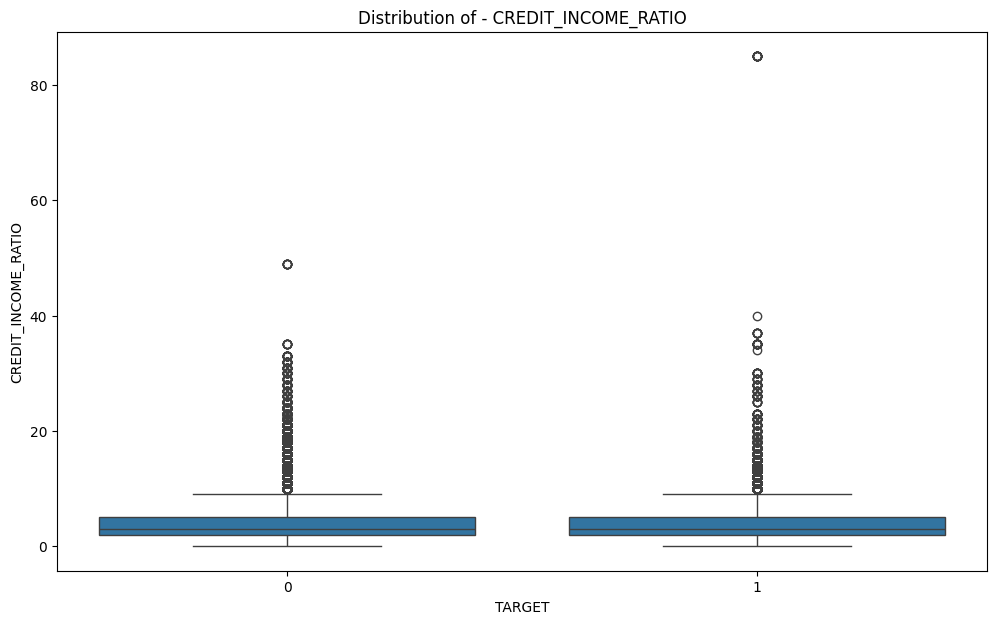

In [80]:
plt.figure(figsize=(12,7))
sns.boxplot(x=df1['TARGET'],y=df1['CREDIT_INCOME_RATIO'])
plt.title('Distribution of - CREDIT_INCOME_RATIO')
plt.plot()

# Feature Selection


In [81]:
list_FinalCol=['SK_ID_CURR','TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_ANNUITY_RANGE',
               'AMT_CREDIT_x','AMT_INCOME_TOTAL','CREDIT_INCOME_RATIO','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
               'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED','DAYS_REGISTRATION',
               'FLAG_EMAIL','OCCUPATION_TYPE', 'CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY',
               'ORGANIZATION_TYPE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
               'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_DAY',
               'EXT_SOURCE_2', 'EXT_SOURCE_3','Total_Documents','NAME_CONTRACT_STATUS',
               'NAME_CLIENT_TYPE','DAYS_BIRTH',
               'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','NAME_CONTRACT_TYPE_x','AMT_ANNUITY_x',
               'REGION_RATING_CLIENT','AMT_GOODS_PRICE_x','EMPLOYMENT_YEAR',]

# 

In [82]:
df_final = df1[list_FinalCol]
df_final.head()
df_final.EMPLOYMENT_YEAR


In [90]:
df_final.shape
df_final.drop_duplicates(inplace= True)

/var/folders/7d/hppk4q955wx8kcl4r2ll10dm0000gn/T/ipykernel_17013/3295612390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop_duplicates(inplace= True)


In [92]:
df_final.to_csv('df_final.csv', index = False)

(743154, 38)

In [83]:
len(list_FinalCol)

38

In [84]:
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRC

In [85]:
df_final.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
AMT_ANNUITY_RANGE              0
AMT_CREDIT_x                   0
AMT_INCOME_TOTAL               0
CREDIT_INCOME_RATIO            0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT_W_CITY    0
ORGANIZATION_TYPE              0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
AMT_REQ_CREDIT_BUREAU_DAY      0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
Total_Documents                0
NAME_CONTRACT_STATUS           0
NAME_CLIENT_TYPE               0
DAYS_BIRTH